# Telco Churn Classification Project
------------

In [81]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn defaults

# import custom modules
import acquire

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

# set seaborn color palette
sns.set_palette('plasma')

# IDEAS: winter (winter_r), magma (magma_r), plasma, Dark2, PuRd, RdPu 
# _r means reversed

In [9]:
# to view current color palette
sns.color_palette()

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

<hr style="border-top: 10px groove violet; margin-top: 1px; margin-bottom: 1px"></hr>

## Questions
- From the tableau telco churn project, I found that 50% of month to month customers who churn, do so in the first 7 months
- What makes customers churn in less than 7 months (median tenure)?
    - get all customers from first 7 months, predict who will stay and who will go
    - may need to re calculate because only looking at month to month customers
    - possible difficulty, not enough data for train test split
    - possible drivers, monthly cost, senior citizen, payment method
- What makes Month to Month customers leave within first year? <--
    - filter out contract type (so that's not a driver, because it will most certainly mess with the model)
    - possible drivers, monthly cost (bin this), payment method, senior citizen, EXPLORE SOME MORE
    - monthly cost (maybe change to higher than average and lower than average)


In [3]:
# use acquire function to obtain dataframe
df = acquire.get_telco_data()

In [4]:
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_movies,paperless_billing,monthly_charges,total_charges,internet_service_type_id,internet_service_type,contract_type_id,contract_type,payment_type_id,payment_type
0,0030-FNXPP,No,Female,0,No,No,3,Yes,No,No internet service,...,No internet service,No,19.85,57.2,3,None,1,Month-to-month,2,Mailed check
1,0031-PVLZI,Yes,Female,0,Yes,Yes,4,Yes,No,No internet service,...,No internet service,No,20.35,76.35,3,None,1,Month-to-month,2,Mailed check
2,0098-BOWSO,No,Male,0,No,No,27,Yes,No,No internet service,...,No internet service,Yes,19.40,529.8,3,None,1,Month-to-month,1,Electronic check
3,0107-WESLM,Yes,Male,0,No,No,1,Yes,No,No internet service,...,No internet service,Yes,19.85,19.85,3,None,1,Month-to-month,1,Electronic check
4,0114-RSRRW,No,Female,0,Yes,No,10,Yes,No,No internet service,...,No internet service,Yes,19.95,187.75,3,None,1,Month-to-month,3,Bank transfer (automatic)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   churn                     7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [76]:
def counting_values(df):
    for col in df.columns:
        # skip over customer ID column
        if col == 'customer_id':
            continue
        if df[col].dtype == 'object':
            print(df[col].value_counts(dropna=False))

In [43]:
counting_values(df)

No     5174
Yes    1869
Name: churn, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
Yes    6361
No      682
Name: phone_service, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64
No                     2

## Cleaning checklist 
(26 columns to start)
- [x] drop duplicate columns (done in SQL) (23 columns now)
- [x] find and deal with empty values (11 empty ones in total_charges)
- [x] change money columns to floats
- [ ] split train test

- create two seperate prepares **prepare_explore** and **prepare_model**

**prepare_explore**
- [ ] get rid of `_id` columns (except customer, maybe)
- [ ] pick final columns to use in prepare_model

**prepare_model**
- [ ] change all yes's and no's to 0s and 1s
- [ ] change all obejcts to numbers (except where nessicary)
- [ ] create dummy coulmns (gender, 




In [20]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type_id',
       'internet_service_type', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type'],
      dtype='object')

In [93]:
# there are 11 columns that don't have a value for total_charges
# they appear to be spaces (since total_charges is stored as a string and no NaN or Null values appear on my df.info()
df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
1301.9      1
4014.6      1
1436.95     1
7251.7      1
1147.45     1
Name: total_charges, Length: 6531, dtype: int64

In [94]:
# convert Total charges to float and deal with emptys 
# use str replace to replace spaces with string 0 then turn entire column to float (may come back and change this to == monthly_charges)
# converting string to 0 becuase after research in SQL, all the values that were empty (aka with the ' ') had a tenure of 0 months
# these people have not paid their first bill yet

df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

df.total_charges.head()


0     57.20
1     76.35
2    529.80
3     19.85
4    187.75
Name: total_charges, dtype: float64

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

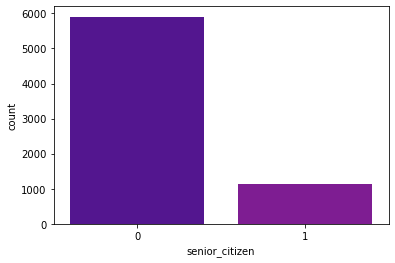

In [95]:
# practice graphing one of the variables
# discovered countplot! exactly what I needed 
# there is a depreciation warning that was silenced but it totally works like this so I'm using it.
sns.countplot(df.senior_citizen)

In [96]:
# function to plot counts all the object columns 
def plot_counts(df):
    for col in df.columns:
        # skip over customer ID
        if col == 'customer_id':
            continue
        if df[col].dtype == 'object':
            sns.countplot(df[col])
            plt.title(f'{col} counts')
            plt.show()

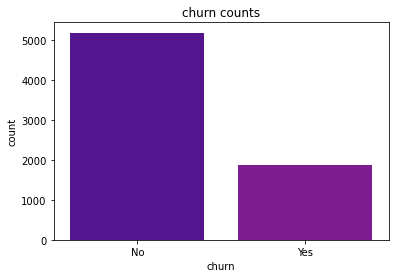

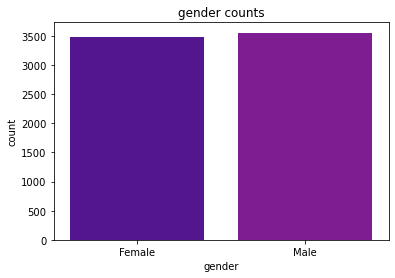

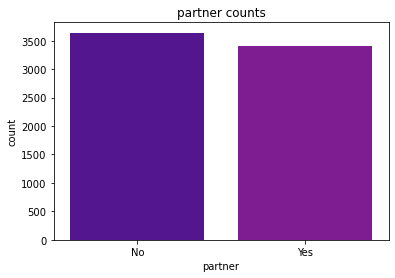

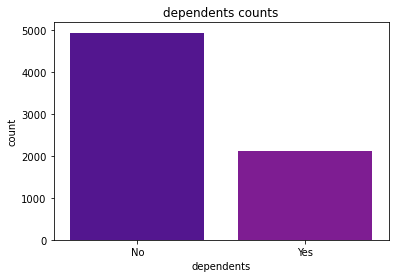

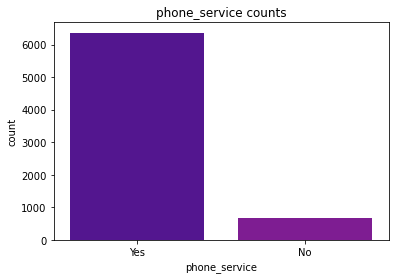

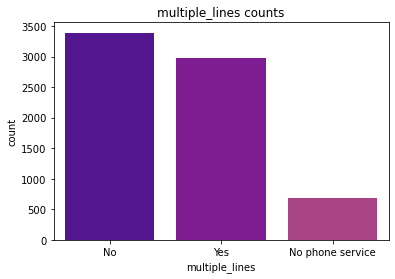

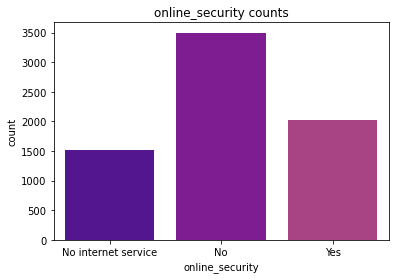

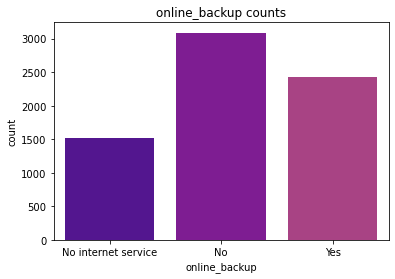

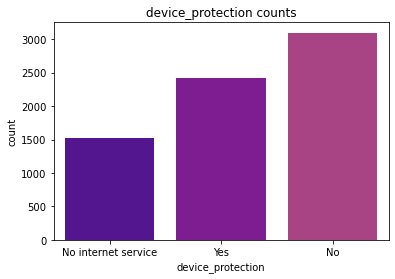

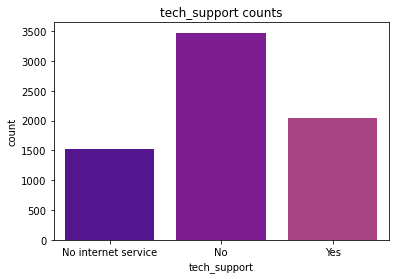

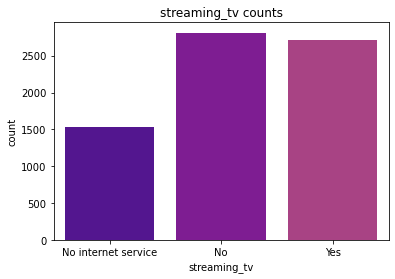

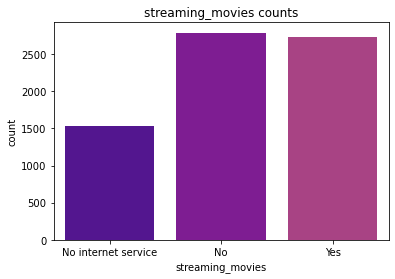

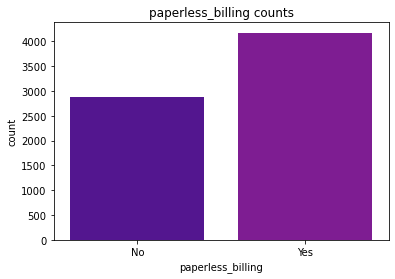

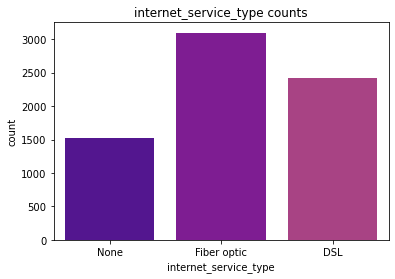

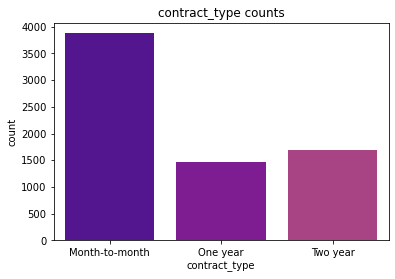

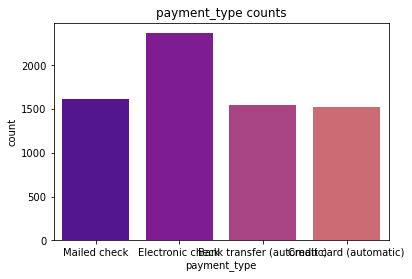

In [97]:
plot_counts(df)

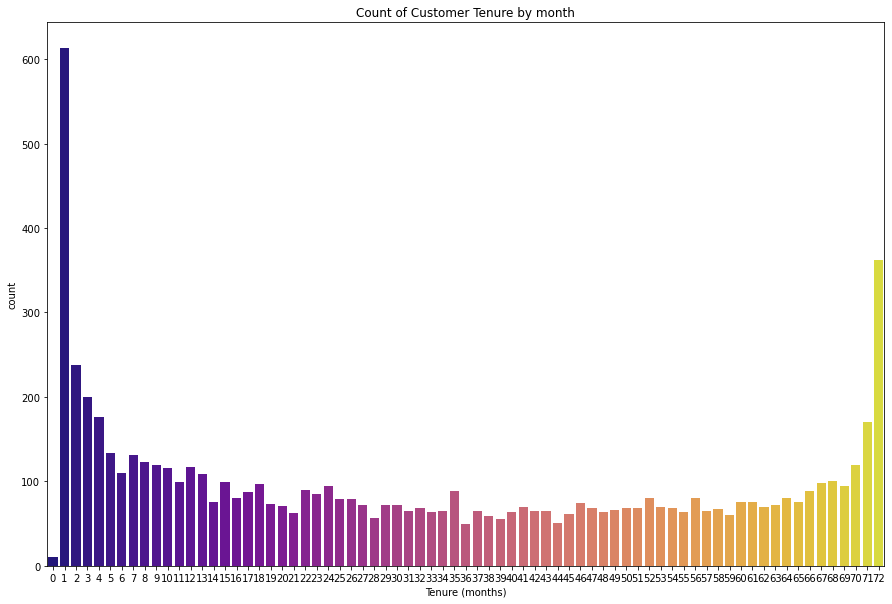

In [107]:
plt.figure(figsize=(15,10))
sns.countplot(df.tenure, palette=('plasma'))
plt.title('Count of Customer Tenure by month')
plt.xlabel('Tenure (months)')
plt.show()

In [142]:
# people who's tenure is less than 12 months. 999 of those people have churned already
df[df.tenure < 12].churn.value_counts()

No     1070
Yes     999
Name: churn, dtype: int64

In [143]:
# median values of people who have been at the company less than a year
df[df.tenure < 12].median().T

senior_citizen                0.00
tenure                        3.00
monthly_charges              56.05
total_charges               157.65
internet_service_type_id      2.00
contract_type_id              1.00
payment_type_id               2.00
dtype: float64

In [144]:
# total churn counts
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [151]:
# median month of tenure for people who churn
# 50% of all people who churn do so before 10 months
# MORE than half of the customers churn before 1 year
df[df.churn == "Yes"].tenure.median()

10.0

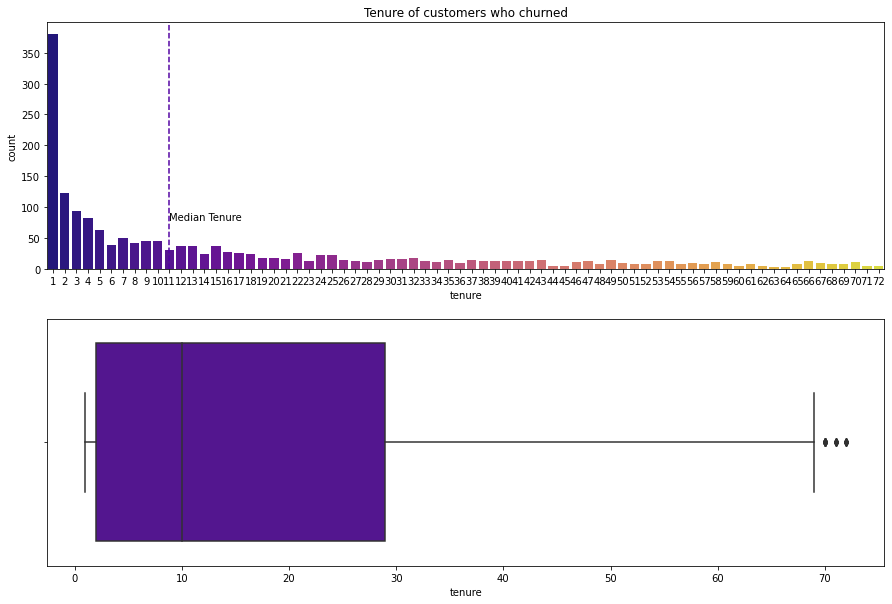

In [214]:
tenure_before_churn = df[df.churn == "Yes"].tenure

plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.countplot(tenure_before_churn, palette=('plasma'))
plt.annotate(text= 'Median Tenure',xy=(10,80))
plt.axvline(x=10, linestyle= '--')
plt.title('Tenure of customers who churned')
plt.subplot(212)
sns.boxplot(tenure_before_churn)
plt.show()